In [18]:
import cv2
import os
import sys
sys.path.append("..")  
from tqdm import tqdm
from utils.preprocessing import split_eye_image


# define source and target folders
processed_healthy = '../data/processed/healthy_eye'
processed_infected = '../data/processed/infected_eye'
split_healthy    = '../data/split/healthy_eye'
split_infected   = '../data/split/infected_eye'

os.makedirs(split_healthy, exist_ok=True)
os.makedirs(split_infected, exist_ok=True)


In [19]:
# %%
skipped = []
for folder_in, folder_out, label in [
    (processed_healthy, split_healthy, 'Healthy'),
    (processed_infected, split_infected, 'Infected')
]:
    for fname in tqdm(os.listdir(folder_in), desc=f"Splitting {label}"):
        img_path = os.path.join(folder_in, fname)
        img = cv2.imread(img_path)
        if img is None:
            skipped.append((folder_in, fname, "Unreadable"))
            continue

        # our helper: it’ll split if w/h >1.5, otherwise just save the one eye
        split_eye_image(image=img,
                        fname_prefix=os.path.splitext(fname)[0],
                        save_dir=folder_out)

Splitting Infected: 100%|██████████| 530/530 [00:00<00:00, 2181.74it/s]


In [20]:
# %%
import pandas as pd
if skipped:
    df = pd.DataFrame(skipped, columns=['source_folder','filename','reason'])
    df.to_csv('../data/log/skipped_splits.csv', index=False)
    print(f"Logged {len(skipped)} skipped files")

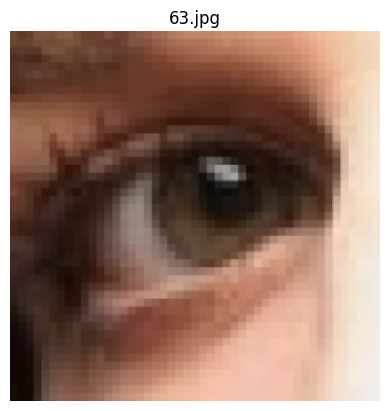

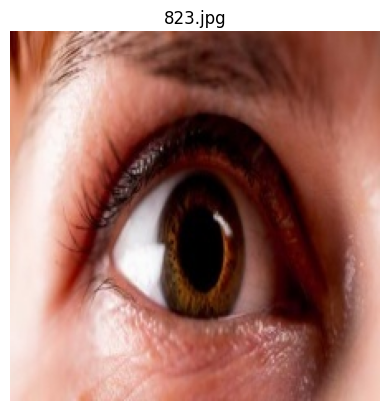

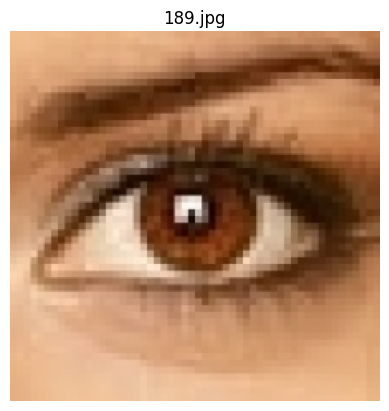

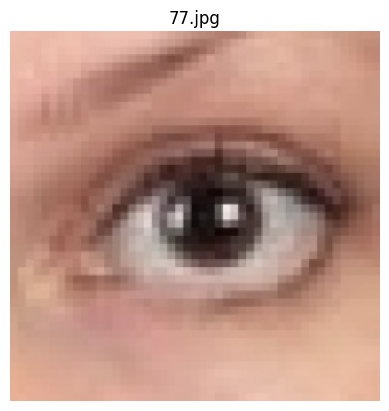

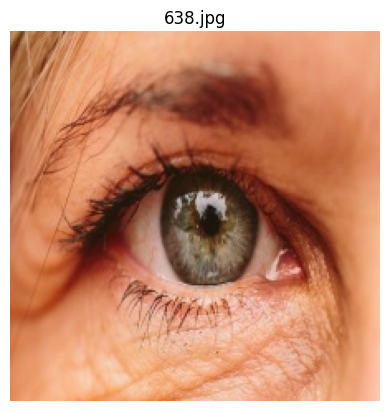

In [21]:
# %%
import matplotlib.pyplot as plt

sample = os.listdir(split_healthy)[:5]
for fname in sample:
    img = cv2.imread(os.path.join(split_healthy, fname))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img); plt.title(fname); plt.axis('off'); plt.show()